# 机器学习工程师纳米学位
## 监督式学习
## 项目：为 *CharityML* 寻找捐赠者

欢迎来到机器学习工程师纳米学位的第二个项目！在此 notebook 中，我们已经为你提供了一些模板代码，你需要实现其他必要功能，以便成功地完成此项目。以**实现**开头的部分表示你必须为下面的代码块提供额外的功能。我们将在每部分提供说明，并在代码块中用 `'TODO'` 语句标记具体的实现要求。请务必仔细阅读说明！

除了实现代码之外，你必须回答一些问题，这些问题与项目和你的实现有关。每个部分需要回答的问题都在开头以**问题 X** 标记。请仔细阅读每个问题并在下面以**答案：**开头的文本框中提供详细的答案。我们将根据你的每个问题答案和所提供的实现代码评估你提交的项目。  

>**注意：** 在提交此 notebook 时，请注明你所使用的 PYTHON 版本。你可以使用键盘快捷键 **Shift + Enter** 执行代码和 Markdown 单元格。此外，可以通过双击进入编辑模式，编辑 Markdown 单元格。

## 开始

在此项目中，你将自己选择实现几个监督式算法，并使用从 1994 年美国人口普查数据中摘取的数据准确地对个人收入进行建模。然后，你将根据初步结果选择最佳候选算法，并进一步优化该算法，以便构建最佳模型。你的目标是构建一个准确预测公民收入是否超过 50,000 美元的模型。公益机构可能会面临此类任务，这些机构需要依赖捐赠。了解公民的收入可以帮助公益机构更好地判断应该请求多少捐赠款，或者是否有必要请求捐赠。虽然直接通过公开的数据判断个人的一般收入范围比较难，但是我们可以通过其他公开特征推断该值，稍后我们就有机会见到这种推断过程。

该项目的数据集来自 [UCI 机器学习资源库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。该数据集是由 Ron Kohavi 和 Barry Becker 捐赠的，他们之前在文章_“Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid”_中发表了该数据集。你可以在[此处](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)找到 Ron Kohavi 的文章。我们在此项目中研究的数据与原始数据集稍有出入，例如删除了 `'fnlwgt'` 特征和缺少条目或者格式糟糕的记录。

----
## 探索数据
运行以下代码单元格以加载必要的 Python 库并加载人口普查数据。注意，该数据集中的最后一列 `'income'` 将是目标标签（个人年收入是否超过 50,000 美元）。人口普查数据库中的所有其他列都是关于每个人的特征。

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

In [2]:
%%html
<style>
.dataframe thead th {
    text-align: left;
}

.dataframe tbody tr th {
    vertical-align: top;
}
</style>
<table border="1" class="dataframe">
  <thead>
<tr style="text-align: right;">
  <th></th>
  <th>age</th>
  <th>workclass</th>
  <th>education_level</th>
  <th>education-num</th>
  <th>marital-status</th>
  <th>occupation</th>
  <th>relationship</th>
  <th>race</th>
  <th>sex</th>
  <th>capital-gain</th>
  <th>capital-loss</th>
  <th>hours-per-week</th>
  <th>native-country</th>
  <th>income</th>
</tr>
  </thead>
  <tbody>
<tr>
  <th>0</th>
  <td>39</td>
  <td>State-gov</td>
  <td>Bachelors</td>
  <td>13.0</td>
  <td>Never-married</td>
  <td>Adm-clerical</td>
  <td>Not-in-family</td>
  <td>White</td>
  <td>Male</td>
  <td>2174.0</td>
  <td>0.0</td>
  <td>40.0</td>
  <td>United-States</td>
  <td>&lt;=50K</td>
</tr>
  </tbody>
</table>
</div>


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### 实现：数据探索
大致研究数据集后可以判断每个类别有多少人，并得出年收入超过 50,000 美元的个人所占百分比。在下面的代码单元格中，你将需要计算以下值：
- 记录总条数：`'n_records'`
- 年收入超过 50,000 美元的人数：`'n_greater_50k'`.
- 年收入不超过 50,000 美元的人数：`'n_at_most_50k'`.
- 年收入超过 50,000 美元的个人所占百分比：`'greater_percent'`.

** 提示：**你可能需要查看上述表格，了解 `'income'` 条目的格式。

In [3]:
# TODO: Total number of records
n_records = data.shape[0]   #shape[0] 获取行数 shape[1] 获取列数  count（number of non-NA elements in a Series），shape(including NA elements）


# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income']=='>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income']=='<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** 特征集探索**

* **age**：连续值。
* **workclass**：Private、Self-emp-not-inc、Self-emp-inc、Federal-gov、Local-gov、State-gov、Without-pay、Never-worked。
* **education**：Bachelors、Some-college、11th、HS-grad、Prof-school、Assoc-acdm、Assoc-voc、9th、7th-8th、12th、Masters、1st-4th、10th、Doctorate、5th-6th、Preschool。
* **education-num**：连续值。
* **marital-status**：Married-civ-spouse、Divorced、Never-married、Separated、Widowed、Married-spouse-absent、Married-AF-spouse。
* **occupation**：Tech-support、Craft-repair、Other-service、Sales、Exec-managerial、Prof-specialty、Handlers-cleaners、Machine-op-inspct、Adm-clerical、Farming-fishing、Transport-moving、Priv-house-serv、Protective-serv、Armed-Forces。
* **relationship**：Wife、Own-child、Husband、Not-in-family、Other-relative、Unmarried。
* **race**：Black、White、Asian-Pac-Islander、Amer-Indian-Eskimo、Other。
* **sex**：Female、Male。 
* **capital-gain**：连续值。
* **capital-loss**：连续值。
* **hours-per-week**：连续值。
* **native-country**：United-States、Cambodia、England、Puerto-Rico、Canada、Germany、Outlying-US(Guam-USVI-etc)、India、Japan、Greece、South、China、Cuba、Iran、Honduras、Philippines、Italy、Poland、Jamaica、Vietnam、Mexico、Portugal、Ireland、France、Dominican-Republic、Laos、Ecuador、Taiwan、Haiti、Columbia、Hungary、Guatemala、Nicaragua、Scotland、Thailand、Yugoslavia、El-Salvador、Trinadad&Tobago、Peru、Hong、Holand-Netherlands。

----
## 准备数据
在将数据作为机器学习算法的输入之前，通常必须整理数据、调整数据格式和结构，这一流程通常称之为**预处理**。幸运的是，该数据集没有必须处理的无效或丢失条目，但是某些特征质量不高，必须加以调整。预处理流程可以大大改善几乎所有学习算法的输出结果和预测能力。

### 转换偏斜连续特征
数据集可能通常至少包含一个具有以下特性的特征：值几乎都接近某个数字，但是也有极端值或比该数字大很多或小很多的值。算法会受到此类值分布的影响，如果值的范围没有正确标准化，算法的效果会大打折扣。对于人口普查数据集来说，有两个特征属于这种情况：'`capital-gain'` 和 `'capital-loss'`。

运行以下代码单元格以为这两个特征绘制直方图。注意值的范围以及分布情况。

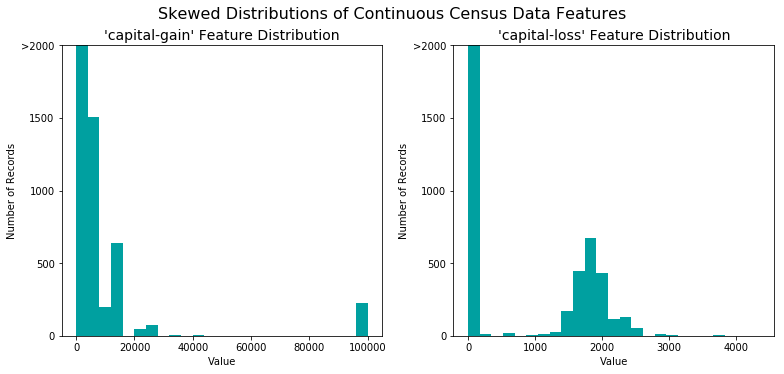

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

对于 `'capital-gain'` 和 `'capital-loss'` 等高度偏斜的特征分布，通常我们都会对数据应用<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，以便非常大和非常小的值不会对学习算法的性能带来负面影响。对数转换可以显著缩小离群值造成的值范围。但是在应用这种转换时必须谨慎：`0` 的对数未定义，因此我们必须让这些值加上一个比 `0` 大的很小的值，以便成功地应用对数算法。

运行以下代码单元格以对数据进行转换并可视化结果。同样，注意值的范围和分布情况。

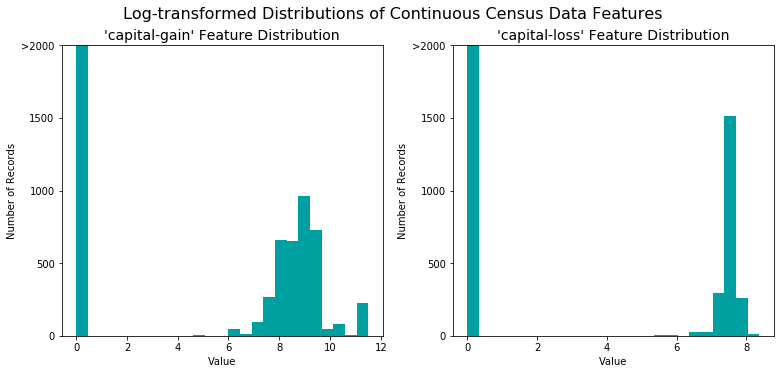

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### 标准化数字特征
除了需要对高度偏斜的特征进行转换之外，通常还建议对数字特征进行某种缩放。对数据进行缩放不会更改每个特征（例如上述 `'capital-gain'` 或 `'capital-loss'`）的分布形状；但是，标准化可以确保在应用监督式学习器时，能够平等地对待每个特征。注意应用缩放之后，观察原始形式的数据将不再具有相同的原始含义，如下所示。

运行以下代码单元格以标准化每个数字特征。为此，我们将使用 [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)。

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### 实现：数据预处理

在上面的**探索数据**表格中，我们发现每个记录都有多个特征是非数字特征。通常，学习算法都预期输入是数字，这就需要转换非数字特征（称为*分类变量*）。一种转换分类变量的常见方式是**独热编码**方法。独热编码会为每个非数字特征的每个可能类别创建一个_“虚拟”_变量。例如，假设 `someFeature` 有三个潜在条目：`A`、`B` 或 `C`。我们将此特征编码为 `someFeature_A`、`someFeature_B` 和 `someFeature_C`。

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

此外，和非数字特征一样，我们需要将非数字目标标签 `'income'` 转换为数字值，以便学习算法能正常运行。因为此标签只有两个可能的类别（“<=50K”和“>50K”），我们可以直接将这两个类别分别编码为 `0` 和 `1`，而不用采用独热编码。在下面的代码单元格中，你需要实现以下步骤：

 - 使用 [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) 对 `'features_log_minmax_transform'` 数据进行独热编码。
 - 将目标标签 `'income_raw'` 转换为数字条目。
   - 将“<=50K”的记录设为 `0`，并将“>50K”的记录设为 `1`。

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x=='>50K' else 0)


# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)


103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### 随机打乱并拆分数据
现在，所有_分类变量_都已转换成数字特征，所有数字特征都已标准化。像往常那样，现在我们将数据（包括特征和标签）拆分为训练集和测试集。80% 的数据用于训练，20% 用于测试。

运行以下代码单元格以进行拆分。

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## 评估模型效果
在此部分，我们将研究四种不同的算法，并判断哪个算法最适合对数据进行建模。其中三个算法将为监督式学习器（你可以随意选择），第四个算法称为*朴素预测器*。

### 指标和朴素预测器
*CharityML* 研究后发现，收入超过 50,000 美元的个人最有可能向他们的组织捐赠。因此，*CharityML* 非常希望准确地知道哪些人的收入超过了 50,000 美元。似乎使用**准确率**作为评估模型效果的指标比较合适。此外，将收入不到 50,000 美元的个人预测为收入超过 50,000 美元对 *CharityML* 有不利的影响，因为他们希望找到愿意捐赠的个人。因此，模型能够准确地预测收入超过 50,000 美元的个人比模型能够**召回**这些个人_更重要_。我们可以使用 **F-β 分数**作为同时考虑精确率和召回率的指标：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

具体而言，当 $\beta = 0.5$ 时，我们更关注精确率。这称为 **F$_{0.5}$ 分数**（简称 F-分数）。

查看分类数据（收入最多达到 50,000 美元和收入超过 50,000 美元的人群）分布图之后，很明显大部分人收入不超过 50,000 美元。这样会对**准确率**带来很大的影响，因为我们可以不用查看数据直接说*“此人收入不超过 50,000 美元”*，并且通常都正确！发表这种言论比较**幼稚**，因为我们都没有考虑任何信息来支持这一言论。考虑数据的*朴素预测*始终很重要，因为这样可以建立判断模型是否效果很好的基准。但是，使用这种预测毫无意义：如果我们预测所有人的收入都不到 50,000 美元，则 *CharityML* 无法发现任何捐赠者。


#### 注意：准确率、精确率、召回率总结

**准确率**衡量的是分类器做出正确预测的概率，即正确预测的数量与预测总数（测试数据点的数量）之比。

**精确率**指的是分类为垃圾短信的短信实际上是垃圾短信的概率，即真正例（分类为垃圾内容并且实际上是垃圾内容的字词）与所有正例（所有分类为垃圾内容的字词，无论是否分类正确）之比，换句话说，是以下公式的比值结果：

`[True Positives/(True Positives + False Positives)]`

**召回率（敏感性）**表示实际上为垃圾短信并且被分类为垃圾短信的短信所占比例，即真正例（分类为垃圾内容并且实际上是垃圾内容的字词）与所有为垃圾内容的字词之比，换句话说，是以下公式的比值结果：

`[True Positives/(True Positives + False Negatives)]`

对于偏态分类分布问题（我们的数据集就属于偏态分类），例如如果有 100 条短信，只有 2 条是垃圾短信，剩下的 98 条不是，则准确率本身并不是很好的指标。我们将 90 条消息分类为垃圾内容（包括 2 条垃圾内容，但是我们将其分类为非垃圾内容，因此它们属于假负例），并将 10 条消息分类为垃圾内容（所有 10 个都是假正例），依然会获得比较高的准确率分数。对于此类情形，精确率和召回率非常实用。可以通过这两个指标获得 F1 分数，即精确率和召回率分数的加权平均值（调和平均数）。该分数的范围是 0 到 1，1 表示最佳潜在 F1 分数（在计算比值时取调和平均数）。

### 问题 1 - 朴素预测器效果
* 如果我们选择一个始终预测个人收入超过 50,000 美元的模型，该模型在该数据集中的准确率和 F-分数是多少？你必须使用以下代码单元格并将结果赋值给 `'accuracy'` 和 `'fscore'` 以供稍后使用。

** 请注意：**生成朴素预测器的目的是展示没有任何智能信息的基本模型是怎样的模型。在现实生活中，理想情况下，基本模型要么是以前模型的结果，要么基于你希望完善的研究论文。如果没有基准模型，获得比随机选择的模型结果更好的模型是一个不错的起点。

** 提示：** 

* 如果模型始终预测“1”（即个人收入超过 5 万美元），则模型没有真负例 (TN) 或假负例 (FN)，因为我们没有做出任何负面预测（ “0”值）。因此，在这种情况下，准确率和精确率一样（真正例/）真正例 + 假正例）），因为值为“1”但是应该为“0”的预测都变成假正例；因此，这种情况下的分母是记录总数。
* 在这种情况下，召回率分数（真正例/（真正例 + 假负例））变成 1，因为没有假负例。

In [9]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income)
FP = income.count()- TP
TN = 0
FN = 0
accuracy  = (TP + TN)/(TP + FP + TN + FN)
recall    = TP / (TP + FN)
precision = TP /(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+pow(beta,2))*recall*precision/(pow(beta,2)*precision+recall)
# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  监督式学习模型
**以下是** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **中目前提供的一些监督式学习模型，你可以从中选择几个模型：**
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树
- 集成方法（Bagging、AdaBoost、随机森林法、Gradient Boosting）
- K 近邻法 (KNeighbors)
- 随机梯度下降法分类器 (SGDC)
- 支持向量机 (SVM)
- 逻辑回归

### 问题 2 - 模型应用
从上述监督式学习模型中选择三个你认为适合解决该问题的模型，并且你将用这些模型对该人口普查数据进行检验。对于所选的每个模型

- 描述该模型的一个实际应用领域。
- 该模型的优势是什么；何时效果很好？
- 该模型的缺点是什么；何时效果很差？
- 根据你对数据的了解情况，为何该模型适合解决该问题？

** 提示：**

请按照上述格式填写答案^，针对你所选的三个模型分别回答这 4 个问题。请在答案中附上参考资料。

**答案：**
#### 随机森林：

随机森林（Random Forest）是Bagging的一个拓展体，它的基学习器固定为决策树，多棵树也就组成了森林，而“随机”则在于选择划分属性的随机，随机森林在训练基学习器时，也采用有放回采样的方式添加样本扰动，同时它还引入了一种属性扰动，即在基决策树的训练过程中，在选择划分属性时，RF先从候选属性集中随机挑选出一个包含K个属性的子集，再从这个子集中选择最优划分属性，一般推荐K=log2（d）

随机森林能够执行回归和分类的任务。同时，它也是一种数据降维手段，用于处理缺失值、异常值以及其他数据探索中的重要步骤，并取得了不错的成效。它担任了集成学习中的重要方法，在将几个低效模型整合为一个高效模型时大显身手。

当在基于某些属性对一个新的对象进行分类判别时，随机森林中的每一棵树都会给出自己的分类选择，并由此进行“投票”，森林整体的输出结果将会是票数最多的分类选项；而在回归问题中，随机森林的输出将会是所有决策树输出的平均值。


应用：诊断眼部患者是否适合带隐形眼镜，首先获取患者眼部状况的各项特征、个人的基本情况比如年龄，工作情况等等。训练这些特征值来预测结果，当有一名新患者时，获取该患者的众多特征得出各个特征输出的众数决定来判定诊断结果。


随机森林的优势有以下三大点：

	* 在所有的算法中，具有极好的准确率；
	* 能够有效运行在大数据集上；
	* 能够处理具有高维特征的输入样本，而且不需要降维；
   * 能够评估各个特征在分类问题上的重要性；
   * 再生成过程中，能够获取到内部生成物产的一种无偏估计；
   * 对于缺省值问题也可以获得很好的结果；

缺点：

   * 随机森林已经被证明在某些噪音较大的分类或者回归问题上回过拟合
	* 可能有很多相似的决策树，掩盖了真实的结果；
   * 对小数据或者低维度数据可能不能产生很好的分类；
   * 执行数据虽然比boosting等快（随机森林属于bagging），但比单只决策树慢多了
    
随机森林训练时间快，本问题特征数多，适合使用随机森林。。

#### 支持向量机(SVM)：
支持向量机(Support Vector Machine, SVM)，通俗来讲，它是一种二类分类模型，基本模型定义为特征空间上的间隔最大的线性分类器，即支持向量机的学习策略便是间隔最大化，最终可转化为一个凸二次优化问题的求解。
或者就是在高维空间中寻找一个合理的超平面将数据点分隔开来，其中涉及到非线性数据到高维的映射以达到数据线性可分的目的。
现实应用：垃圾邮件分类； 根据现有数据集，将垃圾邮件语数据集中高频出现的词汇标记，构建基于垃圾邮件分类器的词汇特征；
优点:

	* 可以解决高维问题，即大型特征空间问题；
	* 能够处理非线性特征的相互关系；
	* 无需依赖整个数据；
	* 泛化错误率低，计算开销不大，结果易解释；

缺点:

	* SVM算法对大规模训练样本难以实施，效率并不是很高；
	* 用SVM解决多分类问题存在困难；
	* 对参数调节和核函数的选择敏感，原始分类器不加修改仅适用于处理二类问题。；  

问题是个分类问题，样本数据不大，适合使用SVM。

#### 逻辑回归(Logistic Regression)：
Logistic回归是回归算法中的一种，跟线性回归研究的是连续量的变化不同，Logistic回归研究对象则变成了离散量，它解决的是二分类问题。例如预测明天是否下雨（预判），垃圾邮件分类（分类）、是否癌症（诊断预判）、是否金融欺诈（分类）。
优点：
	* 速度快，适合二分类问题；
	* 简单易于理解，直接看到各个特征的权重；
	* 能容易地更新模型吸收新的数据；
	* 对逻辑回归而言，多重共线性并不是问题，它可以结合L2正则化来解决该问题；

缺点：
	* 不能反映训练数据本身的特性。能力有限，可以告诉你的是1还是2，但没有办法把整个场景描述出来；
	* 容易欠拟合，分类精度可能不太高；
	* 不能很好地处理大量多类特征或变量；
	* 只能处理两分类问题（在此基础上衍生出来的softmax可以用于多分类），且必须线性可分；
	* 对于非线性特征，需要进行转换；  

本问题是个分类问题,数据量远大于特征数，适合使用Logistic回归。
     
   
参考文案：
*  李航《统计学习方法》
* 《机器学习实战》
* 周志华《机器学习》
* 判别模型和生成模型区别：http://blog.sciencenet.cn/home.php?mod=space&uid=248173&do=blog&id=227964
* 机器学习算法比较:http://www.csuldw.com/2016/02/26/2016-02-26-choosing-a-machine-learning-classifier/"
* 随机森林(RF) https://www.cnblogs.com/maybe2030/p/4585705.html

### 实现 - 创建训练和预测管道
为了准确地评估你所选的每个模型的效果，你需要创建一个训练管道和预测管道，使你能够使用各种规模的训练数据快速有效地训练模型，并且对测试数据进行预测。这一部分的实现将用在后面的部分。你需要在下面的代码单元格中实现以下步骤：
 - 从 [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) 中导入 `fbeta_score` 和 `accuracy_score`。
 - 将学习器与取样训练数据拟合，并记录训练时间。
 - 对测试数据 `X_test` 进行预测，并对前 300 个训练数据点 `X_train[:300]` 进行预测。
   - 记录总的预测时间。
 - 计算训练子集和测试集的准确率分数
 - 计算训练子集和测试集的 F 分数。
   - 确保设置 `beta` 参数！

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    results["model_name"] = learner.__class__.__name__
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner =learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] =  fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
   
    # Return the results
    return results

### 实现：初始模型评估
你需要在代码单元格中实现以下步骤：
- 导入你在前一部分所选的三个监督式学习模型。
- 初始化这三个模型并将它们存储在 `'clf_A'`、`'clf_B'` 和 `'clf_C'`。
  - 针对每个模型使用 `'random_state'`（如果提供了的话）。
  - **注意：**使用每个模型的默认设置——你将在后面的部分调节一个特定的模型。
- 计算 1%、10% 和 100% 的训练数据所包含的条目数。
  - 分别将这些值存储在 `'samples_1'`、 `'samples_10'` 和 `'samples_100'` 中。

**注意：**根据你所选的算法，以下实现可能需要一段时间才能运行完毕！

LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


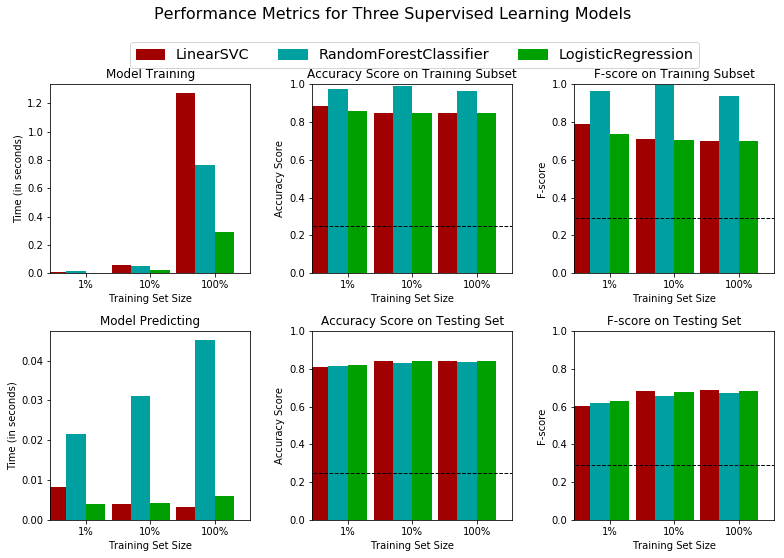

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# TODO: Initialize the three models
clf_A = LinearSVC(random_state=10)
clf_B = RandomForestClassifier(random_state=10)
clf_C =  LogisticRegression(random_state=10)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 =  int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [23]:
clfs = {}

from sklearn.naive_bayes import GaussianNB
clfs["nb"] = GaussianNB()

# 决策树
from sklearn.tree import DecisionTreeClassifier
clfs["dtc"] = DecisionTreeClassifier()

# K近邻 (KNeighbors)
from sklearn.neighbors import KNeighborsClassifier
clfs["knc"] = KNeighborsClassifier()

# 支撑向量机回归(SVC)
from sklearn.svm import SVC
clfs["svc"] = SVC()

# Logistic回归
from sklearn.linear_model import LogisticRegression
clfs['lr'] = LogisticRegression()

# 随机森林
from sklearn.ensemble import RandomForestClassifier
clfs["rfc"] = RandomForestClassifier()

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clfs["adc"] = AdaBoostClassifier()

# 梯度提升树GBDT
from sklearn.ensemble import GradientBoostingClassifier
clfs["gbdt"] = GradientBoostingClassifier()

samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 =  int(len(y_train)/100)

totaldata = pd.DataFrame(columns=['model_name','train_time', 
                                  'pred_time', 
                                  'acc_train', 
                                  'acc_test', 
                                  'f_train',
                                  'f_test'
                                  ])

for clf in clfs:
    #print(clf)
    # print(clfs[clf])
    temp = train_predict(clfs[clf],samples_100,X_train, y_train, X_test, y_test)
    rdata = pd.DataFrame(pd.Series(temp)).T
    totaldata=pd.concat([totaldata,rdata])

totaldata.sort_values(by="train_time",ascending=False)

nb
GaussianNB trained on 36177 samples.
dtc
DecisionTreeClassifier trained on 36177 samples.
knc
KNeighborsClassifier trained on 36177 samples.
svc
SVC trained on 36177 samples.
lr
LogisticRegression trained on 36177 samples.
rfc
RandomForestClassifier trained on 36177 samples.
adc
AdaBoostClassifier trained on 36177 samples.
gbdt
GradientBoostingClassifier trained on 36177 samples.


,acc_test,acc_train,f_test,f_train,model_name,pred_time,train_time
0,0.837148,0.853333,0.674477,0.719697,SVC,26.4284,173.396
0,0.863018,0.856667,0.739534,0.734127,GradientBoostingClassifier,0.0316515,13.6504
0,0.857601,0.85,0.724551,0.711538,AdaBoostClassifier,0.0933988,2.12054
0,0.823549,0.883333,0.639164,0.771605,KNeighborsClassifier,54.6569,1.73658
0,0.837922,0.966667,0.672541,0.952381,RandomForestClassifier,0.0490143,0.832343
0,0.819127,0.97,0.629096,0.963855,DecisionTreeClassifier,0.00813341,0.560794
0,0.841902,0.846667,0.683165,0.698529,LogisticRegression,0.00788546,0.353052
0,0.597678,0.593333,0.420899,0.4125,GaussianNB,0.0358469,0.144214


----
## 改善结果
在最后一部分，你将从三个监督式学习模型中选择用于学员数据的*最佳*模型。然后，你将通过调整至少一个参数，改善未调整模型的 F 分数，从而用整个训练集（`X_train` 和 `y_train`）对模型进行网格搜索优化。 

### 问题 3 - 选择最佳模型

* 根据你之前的评估，用一两段文字向 *CharityML* 解释：在三个模型中，你认为哪个模型最适合发现收入超过 50,000 美元的个人。

** 提示：** 
查看上述单元格左下角的图表（图根据 `vs.evaluate(results, accuracy, fscore) `创建而成），并检查在使用所有训练集时测试集的 F 分数。哪个模型的分数最高？你的答案应该涉及以下内容：
* 指标 - 如果使用了所有的训练数据，则给出测试 F 分数 
* 预测/训练时间
* 算法对数据的适用情况。

**答案：**

* 随机森林的F 分数比SVC和逻辑回归高不少，0.95左右，SVC花的时间会更长，逻辑回归虽然在100%欺诳下花时间最少但是F分数不高。

### 问题 4 - 用通俗的语言描述模型

* 用一两段通俗的文字向 *CharityML* 解释：为何所选的最终模型能够完成任务。确保描述该模型的主要特性，例如模型的训练效果和预测效果。避免使用深奥的数学术语，例如描述方程式。

** 提示：**

在解释模型时，如果你使用了外部资源，请注明引用的所有资源。

**答案：** 

**  本问题要求通过分析数据的各个特征来判断是否符合目标捐赠者，也就是结果为是或者不是，属于二分类型。
   该模型采用随机森林分类器算法。它将许多树组合成一个森林，其中每棵树都是一个类。每棵树都可以根据输入输出一个独立的标签。然后，森林将举行投票。赢得最多票数的标签是森林的输出标签。
**


### 实现：模型调整
细调所选模型。使用网格搜索 (`GridSearchCV`)，并且至少用 3 个不同的值对至少一个重要参数进行调整。为此，你需要使用整个训练集。你需要在下面的代码单元格中实现以下步骤：
- 导入 [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)。
- 初始化你所选的分类器，并将其存储在 `clf` 中。
 - 将 `random_state`（如果有的话）设为之前设置的状态。
- 针对所选模型创建一个你要调整的参数字典。
 - 示例：`parameters = {'parameter' : [list of values]}`。
 - **注意：**避免调整学习器的 `max_features` 参数（如果有的话）！
- 使用 `make_scorer` 创建 `fbeta_score` 评分对象 ($\beta = 0.5$)。
- 使用 `'scorer'` 对分类器 `clf` 进行网格搜索，并将其存储在 `grid_obj` 中。
- 将网格搜索对象与训练数据 (`X_train`, `y_train`) 进行拟合，并将其存储在 `grid_fit` 中。

**注意：**根据你所选的算法和参数列表，以下实现可能需要一段时间才能运行完毕！

In [24]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=10)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'min_samples_split' : [2,4,8,15],
              'min_samples_leaf' : [1,2,3,5]
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8371
F-score on testing data: 0.6707

Optimized Model
------
Final accuracy score on the testing data: 0.8540
Final F-score on the testing data: 0.7148


### 问题 5 - 最终模型评估

* 优化模型在测试数据中的准确率和 F 分数是多少？ 
* 这些分数比未优化模型的分数更高，还是更低？
* 优化模型与在**问题 1** 中得出的朴素预测器基准相比，效果如何？

**注意：**将结果填写在下面的表格中，然后在**答案**文本框内填写描述内容。

#### 结果：

|     评价指标     | 朴素预测器 | 未优化的模型 | 优化的模型 |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| 准确率 |   24.78%        |         83.71%          |       85.40%          |
| F-score  |   0.2917     |          0.6707        |   0.7148      |


**答案：**

 **未优化和优化后的模型跟朴素预测期相比，在F-score和准确率都有大幅的提升，优化后的模型F-score又提高了0.14,准确率也提高了2%的百分点**

----
## 特征重要性

在对数据集（例如本项目中研究的人口普查数据）进行监督式学习时，一个重要任务是判断哪些特征的预测能力最强。通过侧重于几个关键特征与目标标签之间的关系，我们简化了对数据规律的理解流程，这么做始终都很有用。对于此项目来说，我们希望发现几个能够最为有效地预测个人收入最多 50,000 美元还是超过 50,000 美元的特征。

选择一个具有 `feature_importance_` 属性的 scikit 学习分类器（例如 adaboost、随机森林），该属性是一种根据所选分类器对特征重要性进行排序的函数。在下个 python 单元格中，将此分类器与训练集进行拟合，并使用此属性确定人口普查数据集的前 5 个最重要的特征。

### 问题 6 - 特征相关性研究
在**探索数据**时发现，人口普查数据中的每条记录有 13 个特征。在这 13 个特征中，你认为哪 5 个特征对预测来说最重要，并且重要性按照什么顺序排序，原因是？

**答案：**

1. education_level
2. capital-gain
3. age
4. hours-per-week
5. marital-status

** 教育水平高的人一般来说收入相对收入比较好，投资收益高而且工作时间少的人这部分更懂得享受生活也更懂得回馈社会，婚姻状况比较好的人更容易积极的参与社会活动，而随着年龄的增长人的社会责任感和社会同理心也会更强。所以综上选择着5个特征作为最重要的几个因素 **


### 实现 - 提取特征重要性信息
选择一个具有 `feature_importance_` 属性的 `scikit-learn` 监督式学习算法。 该属性是一种根据所选算法对特征在进行预测时的重要性进行排序的函数。

你需要在下面的代码单元格中实现以下步骤：
 - 从 sklearn 中导入与之前用到的三个模型不同的监督式学习模型。
 - 用整个训练集训练该监督式模型。
 - 使用 `'.feature_importances_'` 提取特征重要性信息。

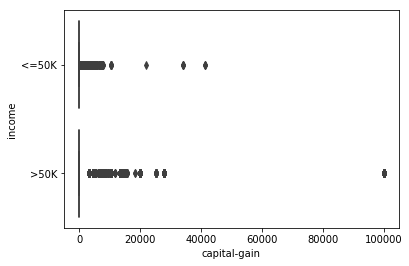

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=data['capital-gain'], y=data['income'], orient="h")

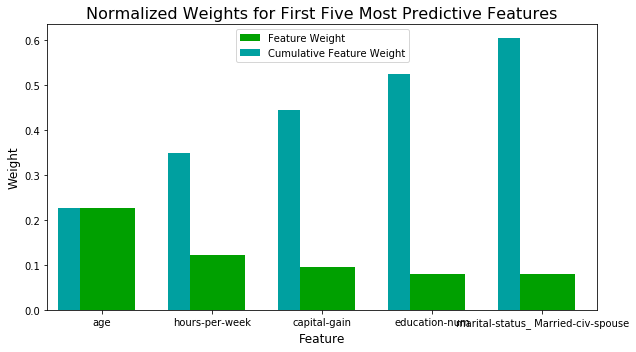

In [25]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model =  RandomForestClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### 问题 7 - 提取特征重要性信息

观察上述仅使用 5 个用于预测个人收入最多为 50,000 美元还是超过 50,000 美元的最相关特征创建的可视化图表，然后回答以下问题。
* 这 5 个特征与在**问题 6** 中发现的 5 个特征相比效果如何？
*  如果答案接近，该可视化图表对论证你的结论有何帮助？
* 如果答案不接近，为何你认为这些特征更相关？

**答案：**
**结果的几个特征，基本上跟我选择特则相同，education-num 跟education_level也是相近的特征，按照权重来看图表年龄的权重最高，说明在所有有钱有闲婚姻状况良好的人士里面，年龄越大越有同理心和帮助社会的意愿，这一点是我没有想到的。 **

### 特征选择
如果我们仅从数据的所有特征中选取部分特征，模型效果会如何？当需要训练的特征更少时，训练时间和预测时间预计会缩短很多，但是效果指标会受到影响。从上面的可视化图表可以看出，前 5 个最重要的特征比数据集中**所有**特征一半的重要性带来的影响要大，表明我们可以尝试*缩小特征空间*，并简化模型要学习的信息。以下代码单元格将使用你在之前发现的同一优化模型，并使用相同的训练集进行训练，*但是仅使用前 5 个重要特征*。

In [26]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8540
F-score on testing data: 0.7148

Final Model trained on reduced data
------
Accuracy on testing data: 0.8474
F-score on testing data: 0.6987


### 问题 8 - 特征选择的影响

* 最终模型在仅使用 5 个特征的缩减数据上的 F 分数和准确率分数与在使用所有特征的数据集上的分数相比如何？
* 如果训练时间是一个因素，你会考虑使用缩减的数据作为训练集吗？

**答案：**

**
准确率和F-score都有不同程度的下降，但是比未优化前又有所提高，说明仅用5个特征还不够；如果训练时间是一个因素，我会考虑将相近的特征缩减来帮助提交训练时间
** 

> **注意**：完成所有代码实现部分并成功地回答了上述每个问题后，你可以将该 iPython Notebook 导出为 HTML 文档并获得最终要提交的项目。为此，你可以使用上面的菜单或依次转到  
 *文件 -> 下载为 -> HTML (.html)**。在提交时，请同时包含该 notebook 和完成的文档。